In [ ]:
import matplotlib.pyplot as plt
def filter_by_episode(df, ep_value:int, episode_col="episode"):
    return df[df[episode_col] == ep_value].copy()

def plot_series(df_ep, y_col, time_col="t", title=None):
    fig = plt.figure(figsize=(8, 4.5))
    plt.plot(df_ep[time_col].values, df_ep[y_col].values)
    plt.xlabel(time_col)
    plt.ylabel(y_col)
    if title is None:
        ep_val = (df_ep["episode"].iloc[0] 
                  if "episode" in df_ep.columns and len(df_ep) > 0 else "?")
        title = f"{y_col} vs {time_col} — episodio {ep_val}"
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{title}.png")

In [ ]:
import pandas as pd
ep = 0  # episodio a graficar
path="Entrenamientos_previos\Recompensas\COM_values_20251029_155728.pid9696.csv"
df = pd.read_csv(path)
df_ep = filter_by_episode(df, ep)

plot_series(df_ep, "COM_x")   # 1ª figura
plot_series(df_ep, "COM_y")   # 2ª figura
plot_series(df_ep, "COM_z")   # 3ª figura
plot_series(df_ep, "ZMP_x")   # 4ª figura
plot_series(df_ep, "ZMP_y") 

In [ ]:
import pandas as pd
ep = 0  # episodio a graficar
path="Entrenamientos_previos\Recompensas\pressure_20251029_155728.pid9696.csv"
df = pd.read_csv(path)
df_ep = filter_by_episode(df, ep)
columnas=df.columns[3:]
for col in columnas:
    plot_series(df_ep, col)
# plot_series(df_ep, "COM_x")   # 1ª figura
# plot_series(df_ep, "COM_y")   # 2ª figura
# plot_series(df_ep, "COM_z")   # 3ª figura
# plot_series(df_ep, "ZMP_x")   # 4ª figura
# plot_series(df_ep, "ZMP_y") 

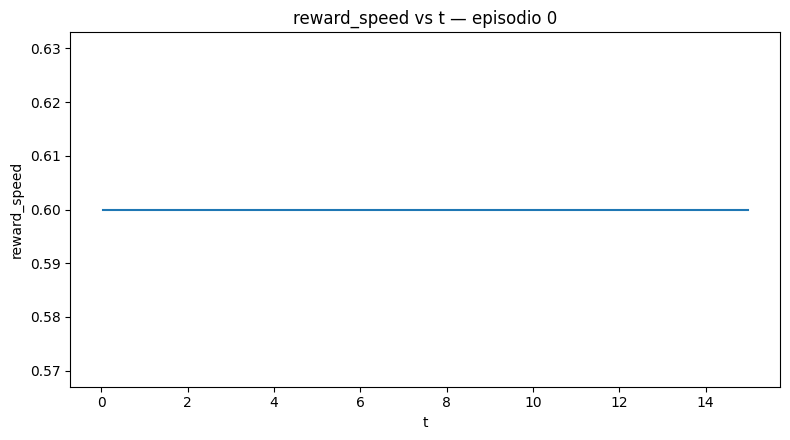

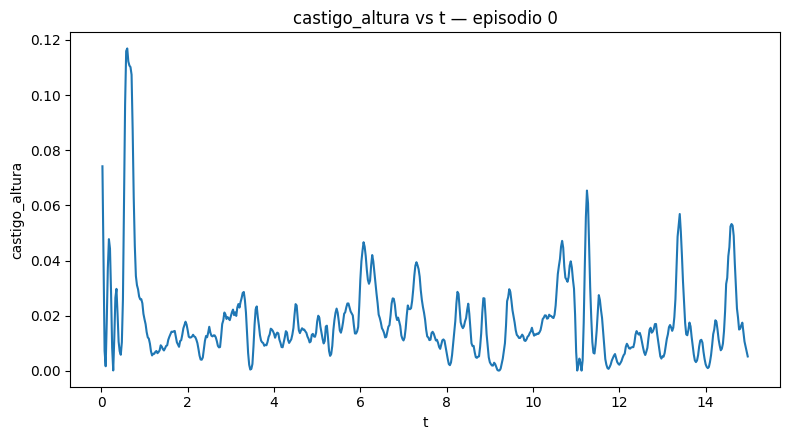

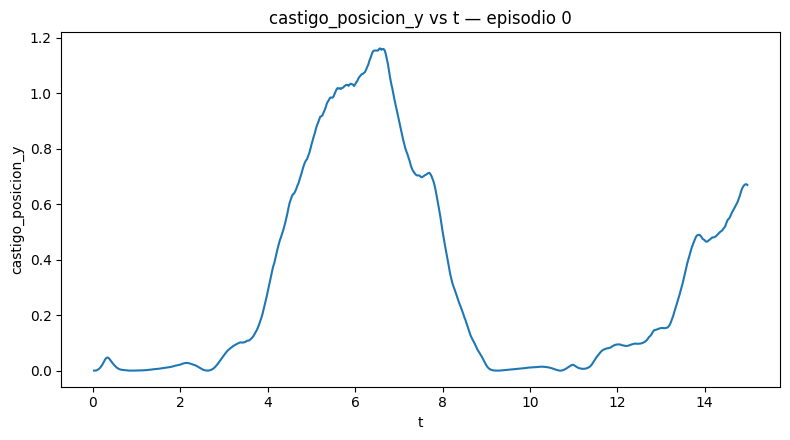

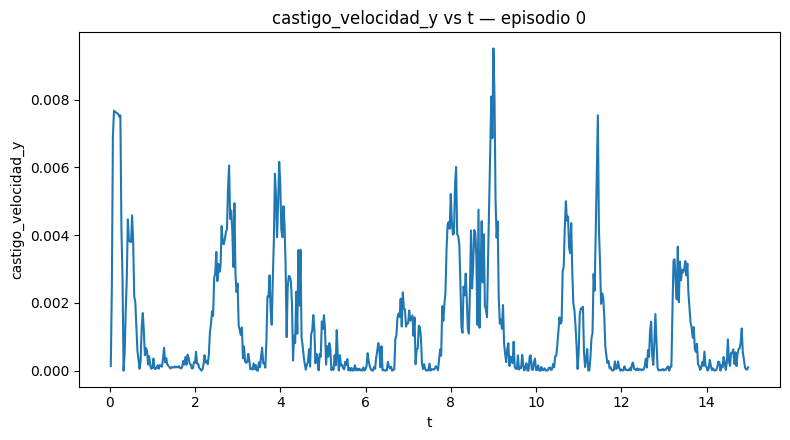

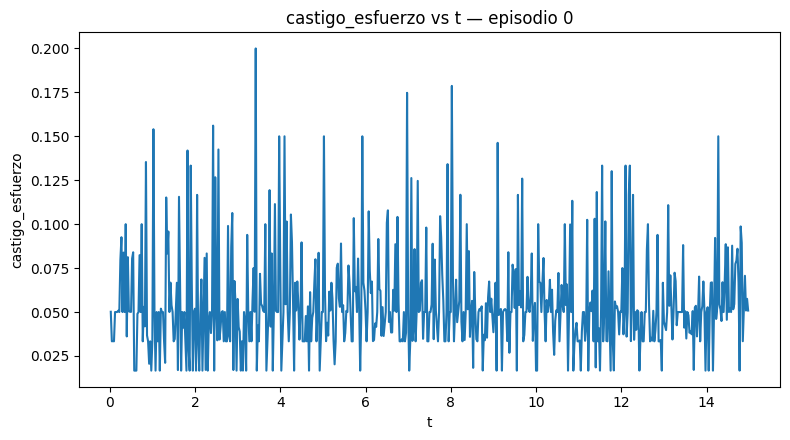

In [6]:
import pandas as pd
ep = 0  # episodio a graficar
path="Entrenamientos_previos/Recompensas/rewards_20251029_155728.pid9696.csv"
df = pd.read_csv(path)
df_ep = filter_by_episode(df, ep)
columnas=df.columns[3:]
for col in columnas:
    plot_series(df_ep, col)
# plot_series(df_ep, "COM_x")   # 1ª figura
# plot_series(df_ep, "COM_y")   # 2ª figura
# plot_series(df_ep, "COM_z")   # 3ª figura
# plot_series(df_ep, "ZMP_x")   # 4ª figura
# plot_series(df_ep, "ZMP_y") 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


ep_col = "episode"            # o "ep", "episode_id", etc.
tcol = "step"                 # o "time", "t", etc.
val = "reward"                # columna a graficar

# Si no hay columna de step, la creamos (contador dentro de cada episodio)
if tcol not in df.columns:
    df[tcol] = df.groupby(ep_col).cumcount()

plt.figure()
for ep, g in df.groupby(ep_col):
    g = g.sort_values(tcol)
    plt.plot(g[tcol].values, g[val].values, label=str(ep))
plt.xlabel(tcol); plt.ylabel(val); plt.title(f"{val} por episodio")
plt.savefig()